In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('na_rep', '-')

In [12]:
df = pd.read_excel(r'D:\PyProjects\work\unit_oborudovanie\results.xlsx', index_col=1)

df = df.query('losses > 1').sort_values(by='kpi', ascending=False)

(df[['kpi', 'unit_name', 'unit_brand', 'storage_value_last_month', 'losses', 'days_dead']].head(20)
 .style.format(
     {'kpi': '{:.2%}', 
      'storage_value_last_month': '₽ {:.2f}', 
      'losses': '₽ {:.2f}',
      'days_dead': '{:.0f}'
      }, na_rep='-'

 ).bar(subset='losses', height=80, color='coral')
 )

,kpi,unit_name,unit_brand,storage_value_last_month,losses,days_dead
unit_id,,,,,,
643340442,231490.02%,Экономпанель белая 1300х500 на овальной ножке,SELA,₽ 2533.69,₽ 424554.41,3
643341188,108815.61%,"Крючок ЭП L200 хром, SL",SELA,₽ 3126.39,₽ 207279.36,76
643340850,101351.32%,"Стойка с перфорацией белая на круглой подставке Ø550 мм, регулируемая max 1400 м",SELA,₽ 2725.85,₽ 168745.45,458
643341412,95534.07%,"Держатель наклонный на круглой ножке белый 110х150 мм, SL",SELA,₽ 2582.39,₽ 160752.80,458
643340642,64011.36%,"Стойка Зигзаг белая 1450х440 мм, SL",SELA,₽ 2582.39,₽ 159772.01,447
643340825,58701.47%,"Корзина бельевая 800х550х700 с пластиковым ящиком, SL",SELA,₽ 2761.72,₽ 179052.89,341
643341031,49784.62%,"Полка белая 900х350х15 мм, SL",SELA,₽ 4017.05,₽ 248423.11,458
643341040,48008.52%,"Полка белая 900х300х15 мм, SL",SELA,₽ 1291.19,₽ 79844.34,458
643340439,43212.98%,"Рейл овальный белый 600х900, SL",SELA,₽ 614.85,₽ 289838.22,93


In [205]:
1.2 * 0.8 * 0.75

0.72

In [206]:
df.query('X > 0.5 and X < 1').sort_values(by='storage_value_last_month')

,Unnamed: 0,X,storage_value,shipping_value,balance_value,days_since_drop_kpi,storage_value_last_month,unit_name,unit_brand,losses
unit_id,,,,,,,,,,


In [207]:
def cut_x(x, high=1):
    if x < 0.01:
        return 0.01
    elif x > high:
        return high
    else:
        return x
    

df_cutted = df.copy()
df_cutted['X'] = df_cutted.X.apply(lambda x:cut_x(x, high=10))

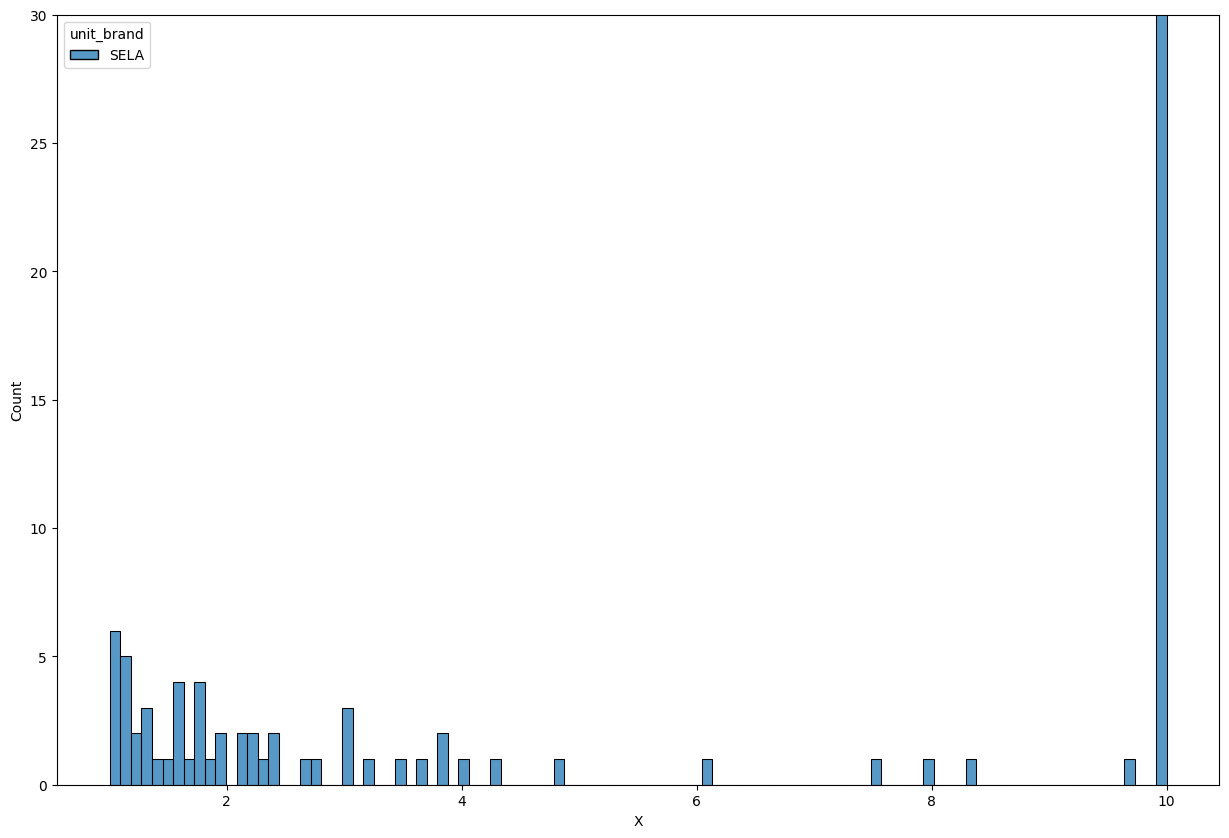

In [208]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df_cutted, x='X', bins=100, hue='unit_brand', multiple='stack')
plt.ylim(0, 30)
plt.show()